In [1]:
import os
import shutil
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
# warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')
warnings.filterwarnings("ignore", category=FutureWarning)

random_seed = 0
cmap_ref = 'nipy_spectral'

In [2]:
json_path = pathlib.Path('data', 'yelp_photos', 'photos.json')
data_photos = pd.read_json(json_path, lines=True)
data_photos.head()

photo_id             business_id  \
0  zsvj7vloL4L5jhYyPIuVwg  Nk-SJhPlDBkAZvfsADtccA   
1  HCUdRJHHm_e0OCTlZetGLg  yVZtL5MmrpiivyCIrVkGgA   
2  vkr8T0scuJmGVvN2HJelEA  _ab50qdWOk0DdB6XOrBitw   
3  pve7D6NUrafHW3EAORubyw  SZU9c8V2GuREDN5KgyHFJw   
4  H52Er-uBg6rNrHcReWTD2w  Gzur0f0XMkrVxIwYJvOt2g   

                                             caption    label  
0  Nice rock artwork everywhere and craploads of ...   inside  
1                                                     outside  
2                                     oyster shooter    drink  
3                                      Shrimp scampi     food  
4                                                        food

In [3]:
data_photos.describe().T

count  unique                     top    freq
photo_id     200100  200098  _CYoxbCIKuAwpq4crHCPWg       2
business_id  200100   36680  FEXhWNCMkv22qG04E83Qjg     528
caption      200100   76413                          103366
label        200100       5                    food  108152

In [4]:
data_photos.label.unique()

array(['inside', 'outside', 'drink', 'food', 'menu'], dtype=object)

>#### On a donc 5 catégories pour lesquelles il va falloir récupèrer de 100 à 200 images

In [5]:
sample_size = 200
data_photos_selection = pd.DataFrame()
for label in data_photos.label.unique():
    print(label)
    data_photos_selection = pd.concat([data_photos_selection, data_photos[data_photos.label == label].sample(sample_size, random_state=random_seed)], axis=0)

inside
outside
drink
food
menu


In [6]:
display(data_photos_selection.head(2), data_photos_selection.shape)

photo_id             business_id  \
26366  4bCgKE0Itp0T8wQXpYsypg  B0TP0GVKZKAi05p-sTjc6w   
88249  RN1AVvw1HXLceaNJkI0GdQ  zNBtF87cr_uzqloqWdO34g   

                           caption   label  
26366  Kerry Courtney (11.16.2018)  inside  
88249                     entrance  inside

(1000, 4)

In [7]:
data_photos_selection.label.value_counts()

inside     200
outside    200
drink      200
food       200
menu       200
Name: label, dtype: int64

In [8]:
data_photos_selection.describe().T

count unique                     top freq
photo_id     1000   1000  4bCgKE0Itp0T8wQXpYsypg    1
business_id  1000    943  pAFtOcz710oLQ-e_J6AIzw    4
caption      1000    436                          529
label        1000      5                  inside  200

# Transfère des images sélectionnées

In [9]:
src_path = pathlib.Path('data', 'yelp_photos', 'photos')
new_path = pathlib.Path('data', 'photos')

### On supprimer un éventuel ancien dossier contenant les images

In [10]:
if os.path.exists(new_path):
    for file in  os.listdir(new_path):
        os.remove(pathlib.Path(new_path, file))
    os.rmdir(new_path)

### Création d'un dossier pour stocker les images sélectionnées

In [11]:
os.mkdir(new_path)

In [12]:
for photo_name in data_photos_selection.photo_id:
    src = pathlib.Path(src_path, f"{photo_name}.jpg")
    dst = pathlib.Path(new_path, f"{photo_name}.jpg")
    shutil.copyfile(src, dst)
print("Copie des images sélectionnée terminé")

Copie des images sélectionnée terminé


# Pré-traitement des images sélectionnées

### On supprimer un éventuel ancien dossier contenant les images pré-traitées

In [13]:
preprocessed_path = pathlib.Path('data', 'photos_preprocessed')

In [14]:
if os.path.exists(preprocessed_path):
    for file in  os.listdir(preprocessed_path):
        os.remove(pathlib.Path(preprocessed_path, file))
    os.rmdir(preprocessed_path)

### On va pré-traiter les images

In [15]:
os.mkdir(preprocessed_path)

In [16]:
from PIL import Image, ImageFilter, ImageOps
from matplotlib import gridspec

data/photos/9gsifzRIZWZEQ_slmUSnIA.jpg OUTSIDE


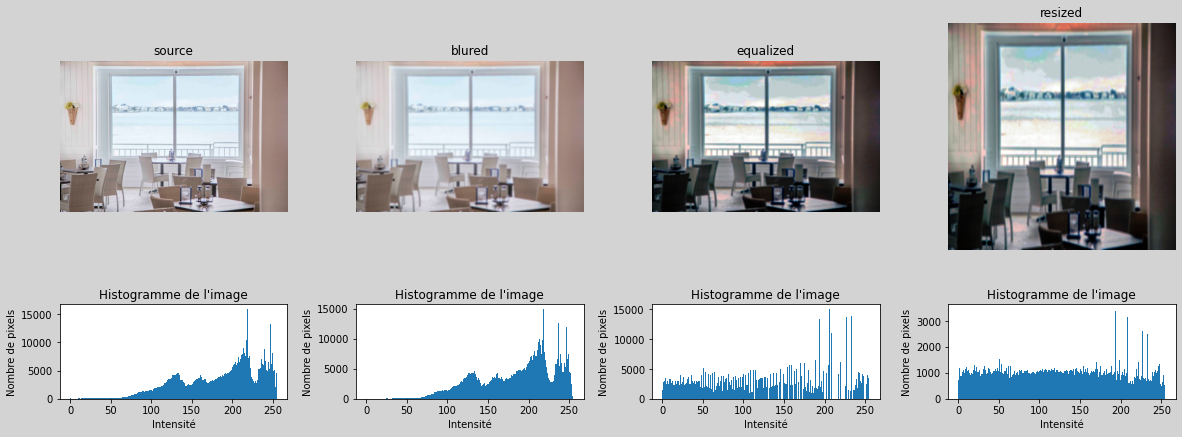

data/photos/RJufWmPFiAgKCKhf3jB-Pg.jpg DRINK


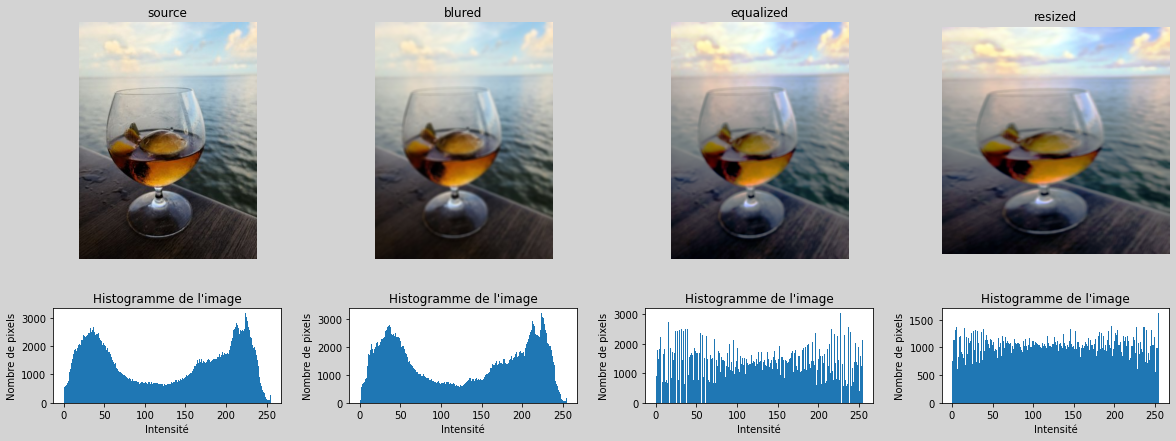

data/photos/MLILQeZOmN1klgyagfRE-A.jpg FOOD


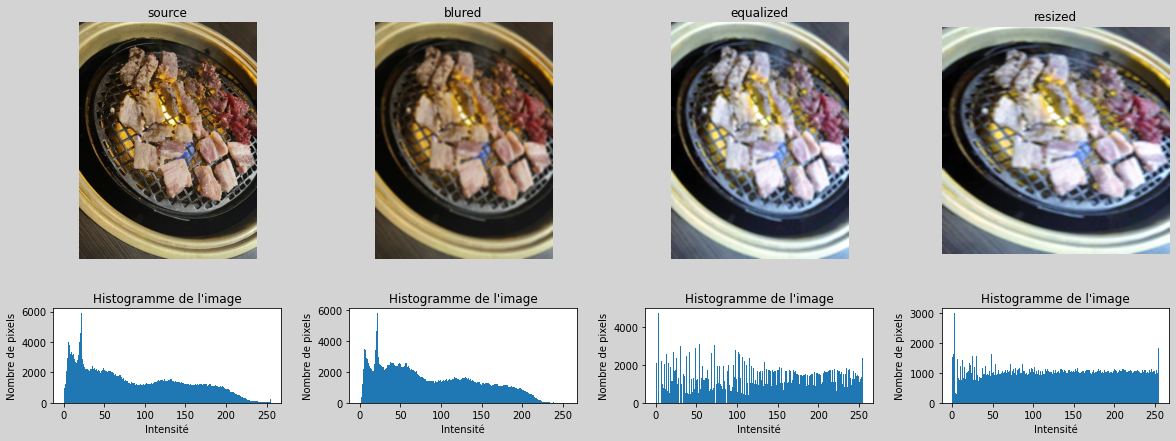

data/photos/k6x2IdfUX-Xphs2XEMz2uw.jpg MENU


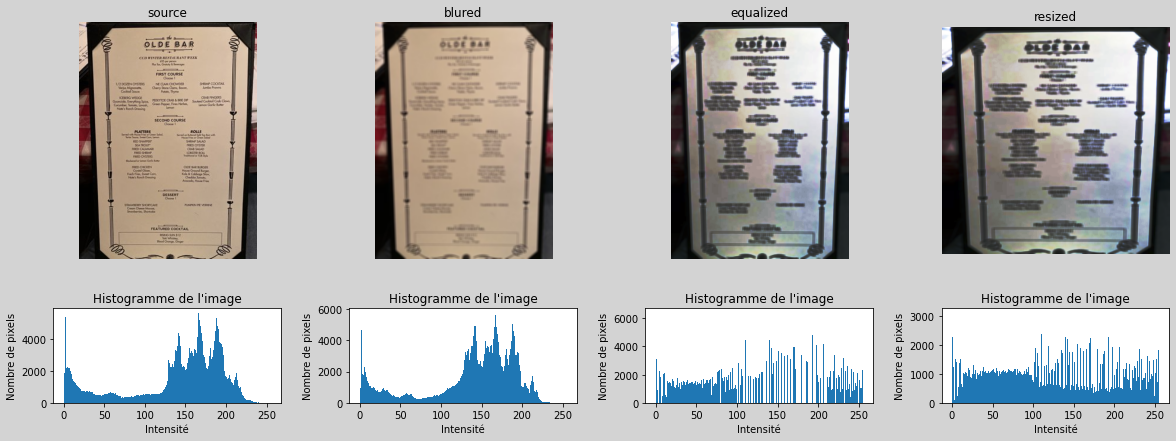

data/photos/0XrINgVTH3LtnhB5N9g-eA.jpg MENU


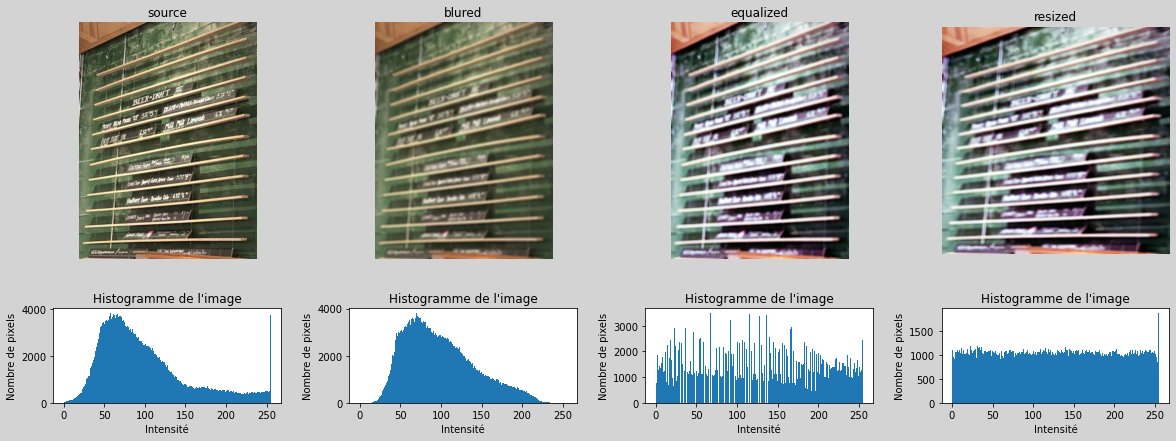

In [17]:
sample_id_show = data_photos_selection.photo_id.sample(5, random_state=random_seed).to_list()
param_blur = 2
newsize = (300, 300)

for i, photo in data_photos_selection.iterrows():
    img_path = pathlib.Path(new_path, f"{photo.photo_id}.jpg")
    img = Image.open(img_path)
    
    # Gray
    # gray_img = ImageOps.grayscale(img)
    
    # Blur
    # blured_img = gray_img.filter(ImageFilter.BoxBlur(param_blur))
    blured_img = img.filter(ImageFilter.BoxBlur(param_blur))
    
    # Equalize
    equalized_img = ImageOps.equalize(blured_img)
    
    # Resize
    final_img = equalized_img.resize(newsize)
    
    # Save image
    export_path = pathlib.Path(preprocessed_path, f"{photo.photo_id}.jpg")
    final_img.save(export_path)

    if photo.photo_id in sample_id_show:
        print(img_path, photo.label.upper())
        fig = plt.figure(figsize=(20,7), facecolor='lightgray')
        
        #steps_show=[img, gray_img, blured_img, equalized_img, final_img]
        steps_show=[img, blured_img, equalized_img, final_img]
        steps_name=["source", "blured", "equalized", "resized"]
        
        spec = gridspec.GridSpec(
                        ncols=len(steps_show), nrows=2,
                        width_ratios=[1]*len(steps_show), wspace=0.3,
                        hspace=0.3, height_ratios=[5, 2]
                        )
        
        for i, image in enumerate(steps_show):

            fig.add_subplot(spec[i])
            plt.title(steps_name[i])
            plt.imshow(image, cmap='gray', vmin=0, vmax=255)
            plt.axis('off')

            fig.add_subplot(spec[i+len(steps_show)])
            mat = np.array(image)
            plt.title("Histogramme de l'image")
            plt.hist(mat.flatten(), bins=range(256))
            plt.xlabel('Intensité')
            plt.ylabel('Nombre de pixels')

        plt.show()

L'**histogramme** d'une image numérique est une courbe statistique représentant la répartition de ses pixels selon leur intensité. <br>Pour une image en noir et blanc, il indique en abscisse le niveau de gris (entier entre 0 et 255) et en ordonnée, le nombre de pixels ayant cette valeur.

Lorsque l'histogramme est **normalisé**, il indique en ordonnée la probabilité pi de trouver un pixel de niveau de gris i dans l'image. (ce n'est pas le cas ci-dessus)

Un **histogramme cumulé normalisé** calcule le pourcentage de pixels ayant une valeur inférieure à un niveau de gris donné. (ce n'est pas le cas ci-dessus)

# 2. Création d'un dictionnaire de `visual-words`
<img src="medias/bovw_process.jpeg" width="400">

## 2.1 Extraction de descripteurs (features) des images avec SIFT, SURF, BRIEF ou ORB

La première étape pour construire un `bag of visual words` est d'effectuer une extraction des features en cherchant des descripteurs pour chaque image du jeu de données. Un bon descripteur doit être capable de gérer l'intensité, la rotation, l'échelle et dans une certaine mesure les variations affines. L'un des algorithmes pour descriptors les plus connus est SIFT *(Scale Invariant Feature Transform)*, mais il est existe d'autres comme SURF *(Spped Up Robust Feature)*, BRIEF *(Binary Robust Independent Elementary Features)* ou ORB *(ORiented BRIEF)*.

Ces algorithmes convertissent chaque patch en un vecteur à *n* dimensions et donc après cette étape, chaque image est une collection de vecteurs de la même dimension (128 pour SIFT), où l'ordre des différents vecteurs n'a pas d'importance.

<img src="medias/bovw_extract_features.png" width="400">

In [18]:
import cv2

In [244]:
# Initialize the ORB / SIFT detector algorithm
max_features = 250
orb = cv2.ORB_create(nfeatures=max_features, patchSize=15)
sift = cv2.SIFT_create(nfeatures=max_features) # patchSize is fixed at ??

data/photos_preprocessed/9gsifzRIZWZEQ_slmUSnIA.jpg OUTSIDE


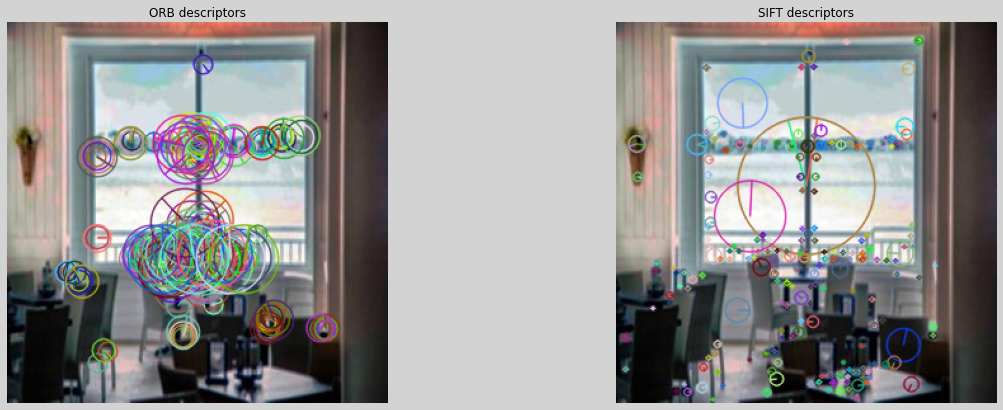

data/photos_preprocessed/RJufWmPFiAgKCKhf3jB-Pg.jpg DRINK


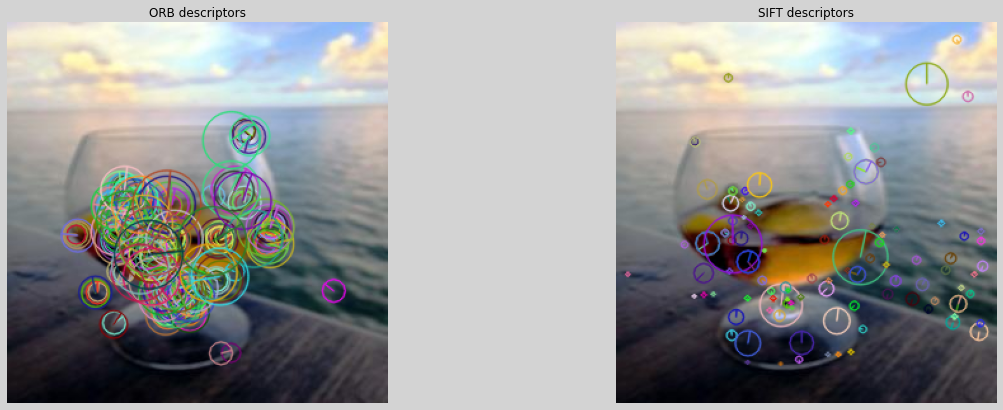

data/photos_preprocessed/MLILQeZOmN1klgyagfRE-A.jpg FOOD


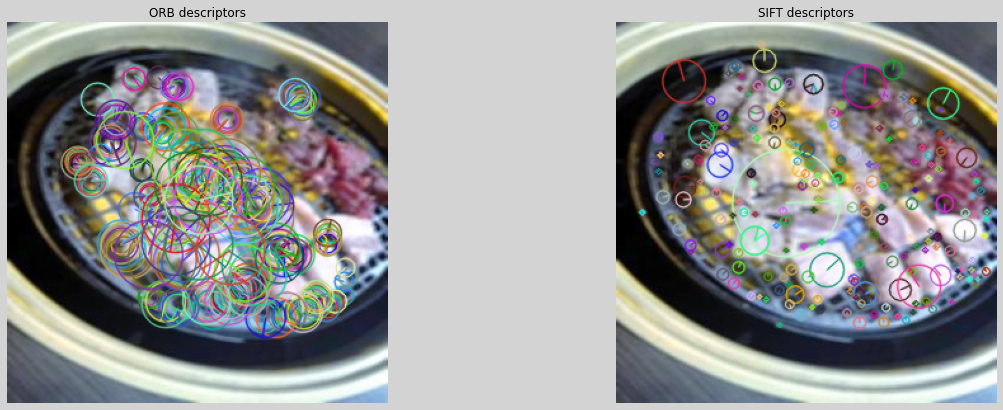

data/photos_preprocessed/k6x2IdfUX-Xphs2XEMz2uw.jpg MENU


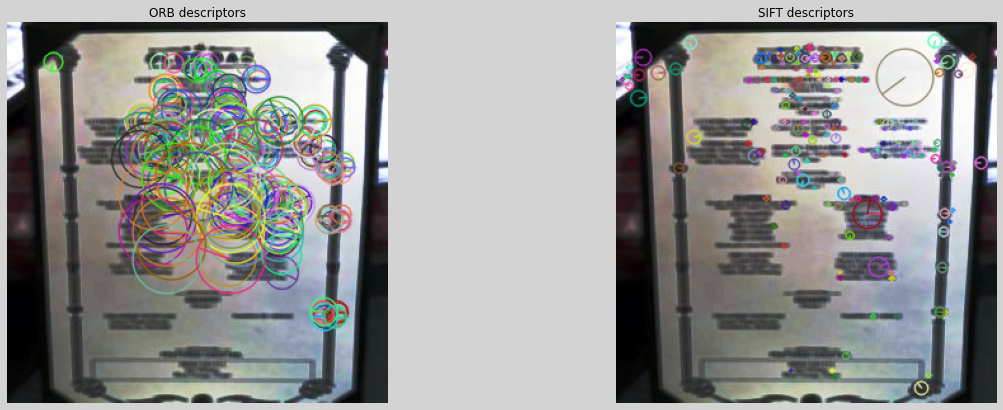

data/photos_preprocessed/0XrINgVTH3LtnhB5N9g-eA.jpg MENU


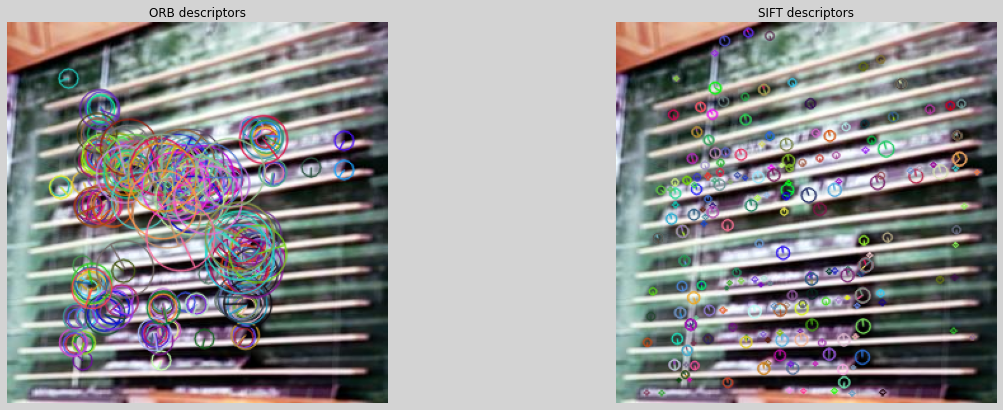

In [245]:
sample_id_show = data_photos_selection.photo_id.sample(5, random_state=random_seed).to_list()
des_list_SIFT=[]
des_list_ORB=[]

for i, photo in data_photos_selection.iterrows():
    img_path = pathlib.Path(preprocessed_path, f"{photo.photo_id}.jpg")
    img = Image.open(img_path)
    
    # Detect the keypoints and compute the descriptors
    mat = np.array(img)
    queryKeypointsORB, queryDescriptorsORB = orb.detectAndCompute(mat,None)
    queryKeypointsSIFT, queryDescriptorsSIFT = sift.detectAndCompute(mat,None)
    
    #des_list_ORB.append((i, queryKeypointsORB, queryDescriptorsORB))
    #des_list_SIFT.append((i, queryKeypointsSIFT, queryDescriptorsSIFT))
    des_list_ORB.extend(queryDescriptorsORB)
    des_list_SIFT.extend(queryDescriptorsSIFT)
    
    if photo.photo_id in sample_id_show:
        print(img_path, photo.label.upper())
        fig = plt.figure(figsize=(20,7), facecolor='lightgray')
        
        # draw only keypoints location,not size and orientation
        plt.subplot(1,2,1)
        plt.title("ORB descriptors")
        #img_orb = cv2.drawKeypoints(mat, queryKeypointsORB, None, color=(0,255,0), flags=0)
        img_orb = cv2.drawKeypoints(mat, queryKeypointsORB, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        plt.imshow(img_orb)
        plt.axis('off')
        
        plt.subplot(1,2,2)
        plt.title("SIFT descriptors")
        #img_sift = cv2.drawKeypoints(mat, queryKeypointsSIFT, None, color=(0,255,0), flags=0)
        img_sift = cv2.drawKeypoints(mat, queryKeypointsSIFT, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        plt.imshow(img_sift)
        plt.axis('off')
        
        plt.show()

In [246]:
len(queryKeypointsORB), len(queryKeypointsSIFT)

(236, 250)

In [247]:
len(des_list_ORB), len(des_list_SIFT)

(246781, 244705)

In [233]:
len(des_list_ORB[0]), len(des_list_SIFT[0])

(32, 128)

#### Essais pour afficher les descriptors identifiés

ORB


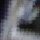

SIFT


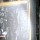

ORB in red, SIFT in yellow


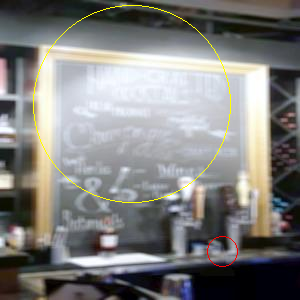

In [201]:
from PIL import ImageDraw 
import random

id = random.randint(0,min(len(queryKeypointsORB), len(queryKeypointsSIFT)))
(x_o, y_o) = queryKeypointsORB[id].pt
size_o = queryKeypointsORB[id].size
angle_o = queryKeypointsORB[id].angle
(x_s, y_s) = queryKeypointsSIFT[id].pt
size_s = queryKeypointsSIFT[id].size
angle_s = queryKeypointsSIFT[id].angle

left_s, left_o = x_s-size_s, x_o-size_o
right_s, right_o = x_s+size_s, x_o+size_o
top_s, top_o = y_s-size_s, y_o-size_o
bottom_s, bottom_o = y_s+size_s, y_o+size_o

# ORB Crop
img_copy = img.copy()
img_copy = img_copy.rotate(-angle_o, center=(x_o, y_o))
img_crop_o = img_copy.crop((left_o, top_o, right_o, bottom_o)).resize((40, 40), Image.Resampling.NEAREST)
print("ORB")
display(img_crop_o)

# SIFT Crop
img_copy = img.copy()
img_copy = img_copy.rotate(-angle_s, center=(x_s, y_s))
img_crop_s = img_copy.crop((left_s, top_s, right_s, bottom_s)).resize((40, 40), Image.Resampling.NEAREST)
print("SIFT")
display(img_crop_s)

# Show position
img_copy = img.copy()
draw = ImageDraw.Draw(img_copy)
draw.ellipse((left_o, top_o, right_o, bottom_o), fill = None, outline ='red')
draw.ellipse((left_s, top_s, right_s, bottom_s), fill = None, outline ='yellow')
print("ORB in red, SIFT in yellow")
display(img_copy)

## 2.2 Création du dictionnaire de visual words avec K-means ou un autre algorithme de clustering...

Les vecteurs générés durant l'étape d'extraction de features ci-dessus vont à présent être convertis en `visual words` *(qui sont aux images ce que les mots sont aux phrases)*. Les `visual words` ne sont rien d'autre que la représentation vectorielle de patches similaires et une fois rassemblés, produisent un **dictionnaire** similaire aux dictionnaires de mots pour les textes.

Cette étape est habituellement réalisée à l'aide d'un **k-means clustering**. 
- Chaque centre de cluster produit par *k-means* devient un *visual word*.
- Le nombre de clusters *k* correspond au nombre de *visual words* que l'on obtiendra au final.
- Le *dictionnaire de visual words* peut être appris sur des *training-sets* distincts.
- Si l'ensemble d'apprentissage est suffisamment représentatif, le livre de codes sera *universel*.
- Le *dictionnaire de visual words* est utilisé pour quantifier les features. La quantification des features signifie que le vecteur de la features est mis en correspondance avec l'index du *visual word* le plus proche dans un *dictionnaire de visual words*.

Pour résumer, chaque patches d'une image est associé à un *visual word* et l'image peut donc être représentée par l'histogramme des *visual words* *(certains revenant plus souvent que d'autres)*.

<img src="medias/bovw_create_dictionary.png" width="400">

In [203]:
from sklearn.metrics import silhouette_score, silhouette_samples # make_scorer

In [204]:
def cv_silhouette_scorer(estimator, X_ref):
    estimator.fit(X_ref)
    cluster_labels = estimator.labels_
    num_labels = len(set(cluster_labels))
    num_samples = len(X_ref.index)
    if num_labels == 1 or num_labels == num_samples:
        return -1
    else:
        return silhouette_score(X_ref, cluster_labels)

In [205]:
scores_df = pd.DataFrame(columns=['Method', 'params', 'best_params', 'silhouette', 'Training time', 'Inference time'])

def get_clustering_scores(method_name, model, X_ref=None, param_grid=None, best_params=None, training_time=None, inference_time=None, register=False, **others):
    """ Compute / Display / Save scores for the provided model

    More precisely, it compute the scores then call various function to display and save them.

    Parameters
    ----------
    method_name: str
        the name used to identify the record in the list
    model: 
        the model that needs to be evaluated
    X_ref: list of lists
        the X values used to get the predictions
    param_grid: dict
        the parameter grid used to get the provided scores
    best_params: dict
        the best parameters found with the gridsearch
    training_time: float
        the time needed for the fitting process
    inference_time: float
        the time needed for the prediction process
    """

    if X_ref is None:
        X_ref = X_cluster

    silhouette_avg = cv_silhouette_scorer(model, X_ref)
    scores = {'silhouette': silhouette_avg}

    # Register score and replace if it already exists
    # if register:
    #    save_score(method_name, param_grid, best_params, training_time, inference_time, **scores)

    # Basic report
    scores_str = ""
    for key in scores.keys():
        scores_str += f"{key.upper().rjust(20)} : {scores[key]:.4f}\n"

    print(f"--- {method_name} ---".ljust(100, '-'), "\n\n", scores_str, sep="")

    # Silhouette plot
    # visualizer = SilhouetteVisualizer(model, colors='yellowbrick', is_fitted=True)
    # visualizer.fit(X_ref)
    # visualizer.show();
    draw_silhouette(model, X_ref, silhouette_avg=silhouette_avg)

In [206]:
#from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance
import matplotlib.cm as cm

In [207]:
def draw_silhouette(fitted_model, X_ref, silhouette_avg=None):

    #fig, (ax1, ax2) = plt.subplots(1, 2)
    #fig.set_size_inches(15, 7)
    fig = plt.figure(figsize=(7, 7))

    if silhouette_avg is None:
        silhouette_avg = cv_silhouette_scorer(fitted_model, X_ref)

    cluster_labels = fitted_model.labels_
    try:
        sample_silhouette_values = silhouette_samples(X_ref, cluster_labels)
    except Exception:
        print("Il n'y a qu'un seul cluster, et silhouette_samples à besoin d'au moins 2 cluster...")
        return

    if hasattr(fitted_model, 'n_clusters'):
        n_clusters = fitted_model.n_clusters
    elif hasattr(fitted_model, 'n_features_in_'):
        # n_clusters = fitted_model.n_features_in_
        n_clusters = pd.DataFrame(cluster_labels).nunique()[0]

    # 1st Plot showing the silhouettes
    ax1 = fig.add_subplot(111)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        #color = cm.cmap_ref(float(i) / n_clusters)
        color = cm.nipy_spectral(float(i) / n_clusters)

        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(f"Silhouette analysis with n_clusters = {n_clusters}", fontsize=14, fontweight="bold")
    plt.show()

In [252]:
from sklearn.manifold import TSNE

def plot_TSNE(model_ref, X_ref, title='K-Means Clustering'):
    
    X_embedded = TSNE(n_components=2).fit_transform(X_ref)
    dataV=pd.DataFrame(X_embedded, columns=["D1","D2"])
    dataV['cluster']=model_ref.labels_.tolist()
    
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(dataV['D1'],dataV['D2'], c=dataV['cluster'], s=50, cmap=cmap_ref, marker='+')
    plt.colorbar(scatter)
    ax.set_title(title)
    ax.set_xlabel('Dimention 1')
    ax.set_ylabel('Dimention 2')
    plt.show()

In [209]:
from sklearn.cluster import KMeans

In [261]:
# num_clusters = data_photos.label.nunique()
num_clusters = 200
sample_size = 50000

In [258]:
X = pd.DataFrame(des_list_SIFT[:sample_size])

In [259]:
kmeans_SIFT = KMeans(random_state=random_seed, n_clusters=num_clusters).fit(X)

In [ ]:
get_clustering_scores("Kmeans [basic]",  model=kmeans_SIFT, X_ref=X, register=True)

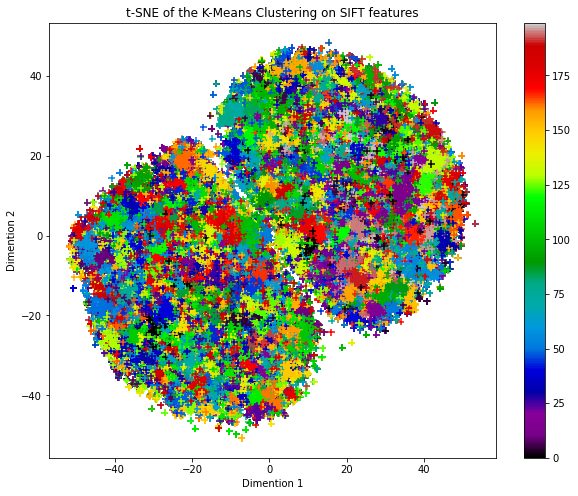

In [253]:
plot_TSNE(kmeans_SIFT, X, title="t-SNE of the K-Means Clustering on SIFT features")

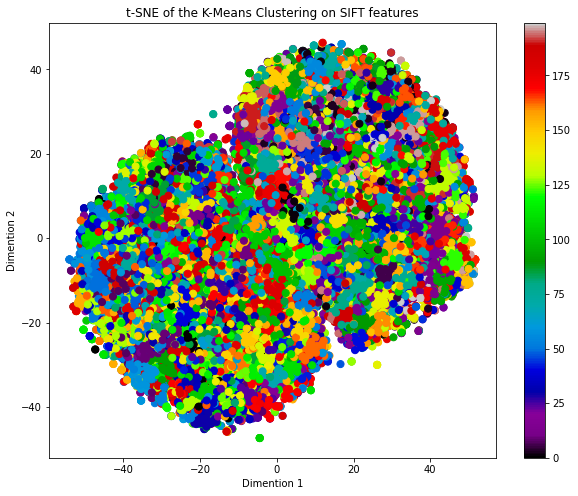

In [251]:
plot_TSNE(kmeans_SIFT, X, title="t-SNE of the K-Means Clustering on SIFT features")

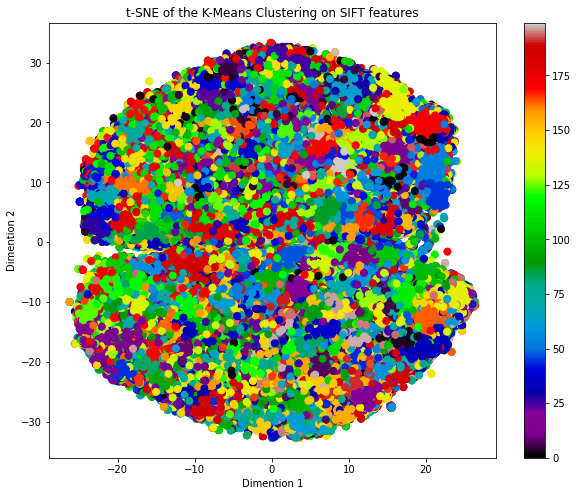

In [239]:
plot_TSNE(kmeans_SIFT, X, title="t-SNE of the K-Means Clustering on SIFT features")

In [ ]:
X = pd.DataFrame(queryDescriptorsORB)

In [ ]:
kmeans_ORB = KMeans(random_state=random_seed, n_clusters=num_clusters).fit(X)

In [ ]:
get_clustering_scores("Kmeans [basic]",  model=kmeans_ORB, X_ref=X, register=True)

In [ ]:
plot_TSNE(kmeans_ORB, X, title="t-SNE of the K-Means Clustering on ORB features")

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(queryDescriptorsSIFT[100].reshape(4,32), cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
len(queryDescriptorsSIFT[0])